<a href="https://colab.research.google.com/github/KimMunho/ComputerVision/blob/main/HW2/HW2_2020039012_KimMunho_(2_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### HW2-2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
원본이미지



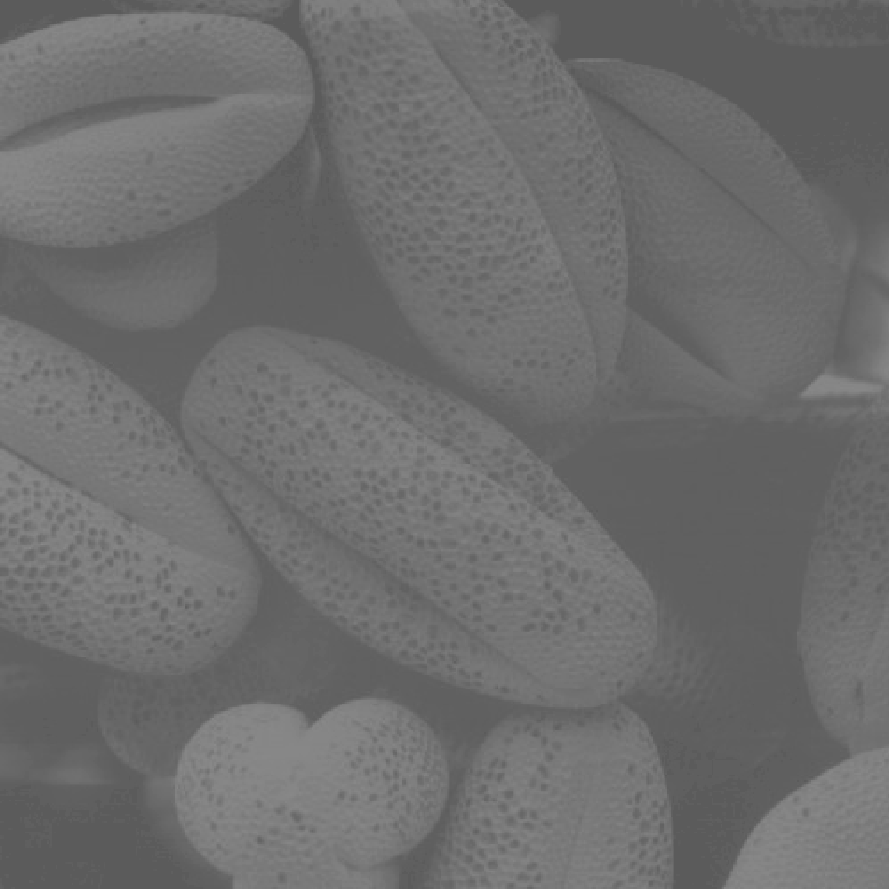

(a)



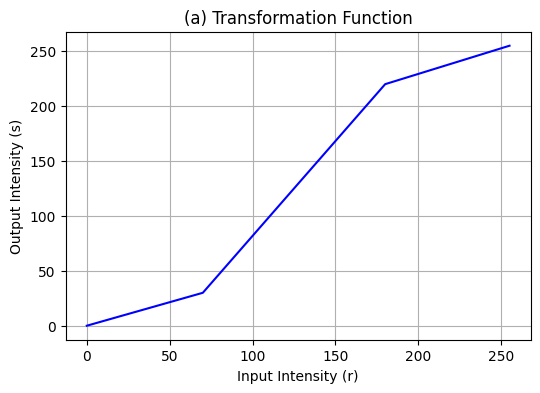

(b)



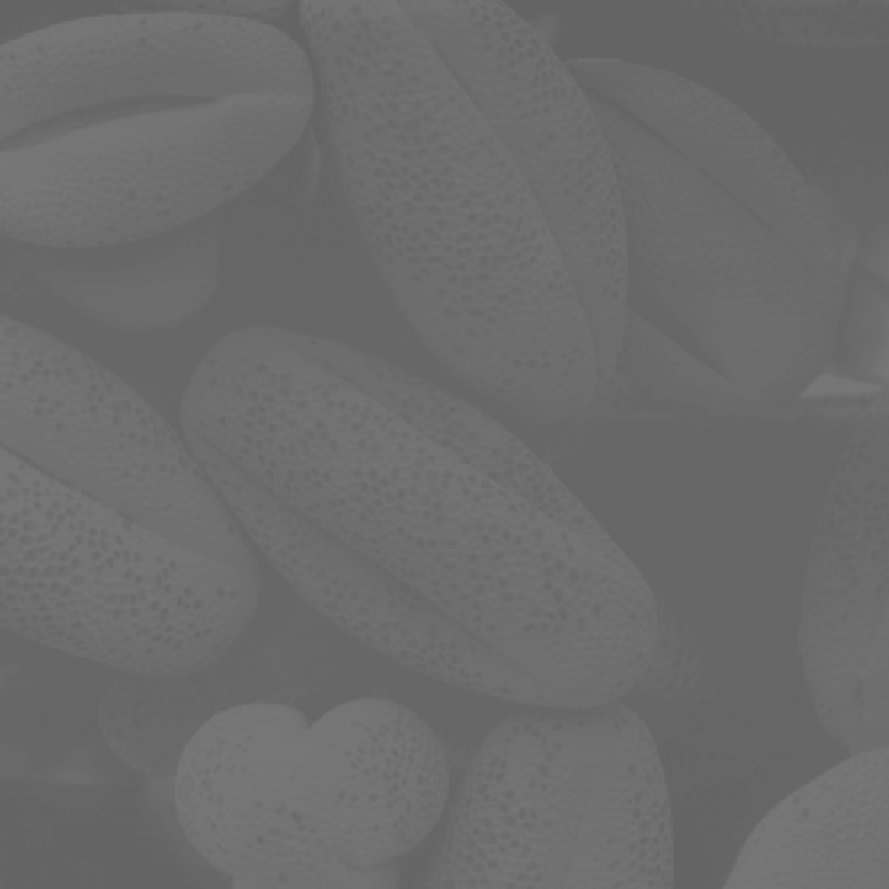

(c)



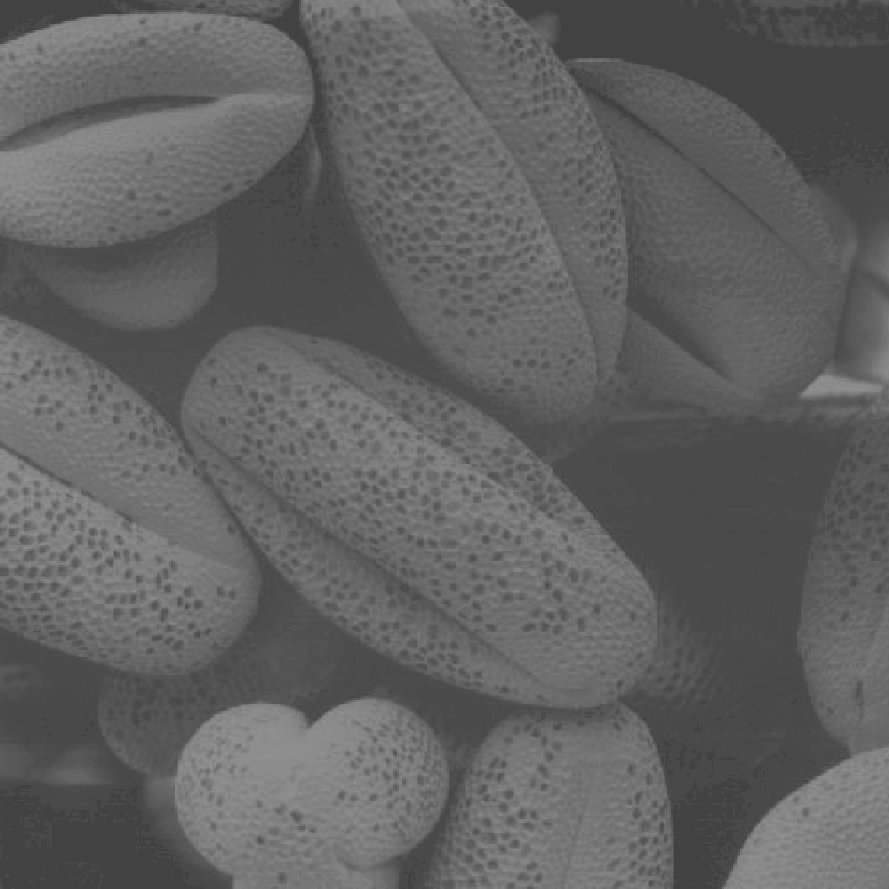

(d)



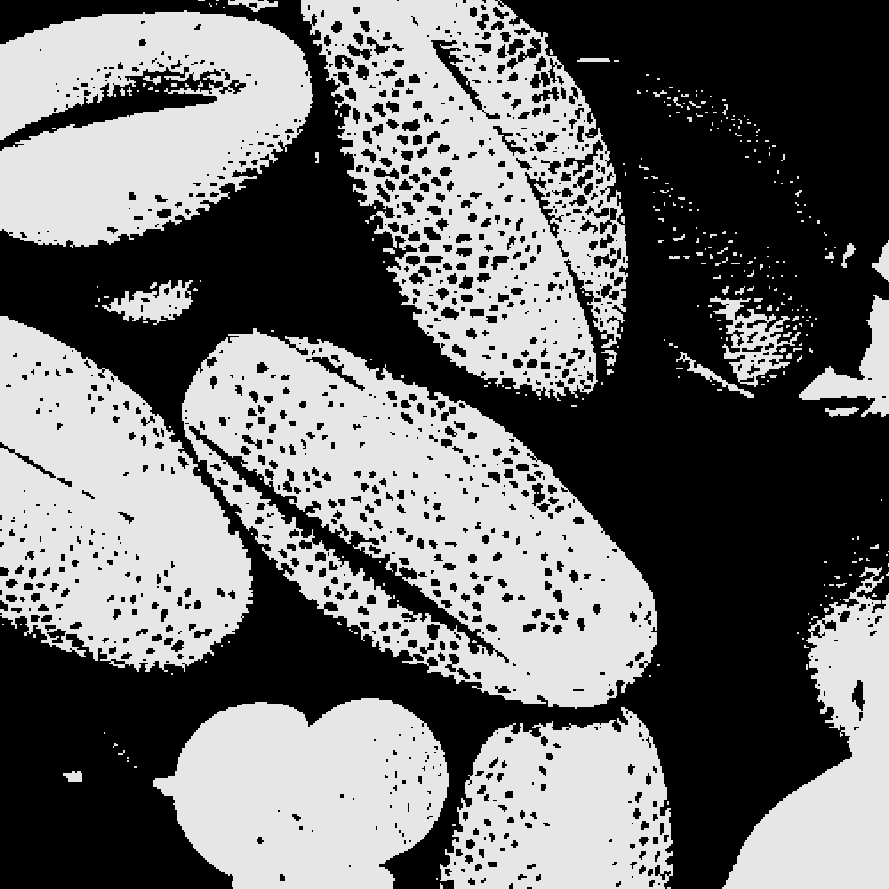

In [ ]:
 # OpenCV를 사용하기 위한 초기 설정

import cv2
import numpy as np   # 넘파이 사용
import matplotlib.pyplot as plt   # matplotlib : 시각화라이브러리
from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

# 이미지 불러오기

from google.colab import drive
drive.mount('/content/drive')

img_path = '/content/drive/MyDrive/Colab Notebooks/ComputerVision/HW2/Fig3.10(b).tif'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Import Failed")

import matplotlib.pyplot as plt

# 원본 이미지
print("원본이미지\n")
cv2_imshow(img)


### (a) - 이미지 대비 향상을 위한 변환 함수 시각

# r1, s1 = 입력 밝기값의 기준 구간
r1, s1 = 70, 30
# r2. s2 = 해당 구간에서 출력 밝기값
r2, s2 = 180, 220
# (r1, s1)부터 (r2, s2) 사이를 선형적으로 늘려서 명암 대비를 증가


# 입력 밝기값 r을 받아서 출력 밝기값 s로 변환하는 함수
def transformation_function(r):
    if r < r1:
      # 0 → s1 : 어두운 영역 처리
        return (s1 / r1) * r
    elif r <= r2:
      # s1 → s2	: 대비 강조 구간
        return ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
    else:
      # s2 → 255	: 밝은 영역 처리
        return ((255 - s2) / (255 - r2)) * (r - r2) + s2

# x축: 입력 밝기값 (0~255)
x_vals = list(range(256))

# y축: 변환 함수에 적용한 출력값
y_vals = [transformation_function(int(r)) for r in x_vals]

# 결국 (입력 밝기, 출력 밝기) 쌍을 만들어서 시각화

print("(a)\n")
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, color='blue')
plt.title("(a) Transformation Function")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.grid(True)
plt.show()

### (b) - 저대비 적용 (밝은 부분과 어두운 부분의 구분이 잘 안 되는 이미지)
print("(b)\n")

low_contrast_img = cv2.normalize(img, None, alpha=100, beta=120, norm_type=cv2.NORM_MINMAX)
# 알파값과 베타값에 차이를 작게 설정 (차이 : 20)
cv2_imshow(low_contrast_img)


### (c) - Contrast Stretching 적용 (밝은 부분과 어두운 부분의 구분을 확실하게 해줌)
print("(c)\n")

def contrast_stretching(img, r1, s1, r2, s2):
    output = np.zeros_like(img, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r = img[i, j]
            if r < r1:
                output[i, j] = int((s1 / r1) * r)
            elif r <= r2:
                output[i, j] = int(((s2 - s1) / (r2 - r1)) * (r - r1) + s1)
            else:
                output[i, j] = int(((255 - s2) / (255 - r2)) * (r - r2) + s2)
    return output

# 픽셀 값을 0~255으로 설정

stretched_img = contrast_stretching(img, r1, s1, r2, s2)
cv2_imshow(stretched_img)

### (d) - Thresholding 적용 (밝기값이 임계값보다 크면 흰색(255), 작으면 검정(0) 설정)
print("(d)\n")

value1 = 110
value2 = 230
# value1의 값이 클수록 밝은 이미지 생성, value1의 값이 작을수록 어두운 이미지 생성
# value2의 값이 클수록 흑백의 차이가 확실하고 value2의 값이 작을수록 흑백의 차이가 약해지기 때문에 회색빛(value2=180)이 돈다
# value1과 value2의 차이가 클수록 더 강한 대비가 생긴다
thresholded_img = cv2.threshold(img, value1, value2, cv2.THRESH_BINARY)[1]
cv2_imshow(thresholded_img)





